<h1 align='center'> Optimización en Máquinas de Aprendizaje</h1> 

<h3>Autor</h3>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

<h3>Fork</h3>

<h3>Referencias</h3>

1. Nocedal Jorge and Stephen Wright, *Numerical Optimization*, Second edition, Springer, 2006.
2.  Ian Goodfellow, Yosua Bengio and Aaron Courville, *Deep Learning*, MIT press, 2016.



La optimización está en el corazón de casi todas las técnicas de aprendizaje automático y estadística utilizados en la ciencia de datos. Discutimos los marcos centrales de optimización detrás de los métodos de modelado estadístico / aprendizaje automático.

<h2> 1. Introducción </h2>

 
La mayoría de los algoritmos de máquinas de aprendizaje implican la optimización de alguna función $f(\mathbf{x})$. 

La *optimización* se refiere a la tarea de minimizar o maximizar alguna función $f(\mathbf{x})$. Usualmente formulamos la mayoría de los problemas de optimización en términos de minimizar $f(\mathbf{x})$.

La maximización se puede lograr mediante un algoritmo de minimización:  minimizando $-f(\mathbf{x})$.

La función que queremos minimizar o maximizar se llama función **objetivo (objetivo)**. Cuando lo estamos minimizando, también podemos llamarlo función de costo, función de pérdida o función de error.



A menudo denotamos el valor que minimiza o maximiza una función con un superíndice ∗. Por ejemplo, podríamos decir $x^∗ = argmin f(\mathbf{x})$.




<h2> 2. Métodos basados en gradientes </h2>


En esta seccción introducimos los llamado métodos de optimización de primer orden. Estos están basados en el gradiente.

Frecuentemente las funciones que optimizamos en el área de aprendizaje de máquinas son funciones de varias variables, es decir, funciones de la forma $f : \mathbb{R}^n \to \mathbb{R}$. Cada variable en el área de aprendizaje de máquinas es llamada *feature*. Entonces las entradas de la función son *features*. Adicionalmente se asume que la salida de la función es un número real, es decir un escalar. Cuando la salida es de tipo continuo, se dice que es un problema de regresión. Por otro lado, si la salida es finita, se trata de un problema de clasificación. 

Para funciones con múltiples features, debemos hacer uso del concepto de derivadas parciales. La derivada parcial $ \frac{\partial f}{\partial x_i} (\mathbf{x})$ es una cantidad que mide la velocidad instantánea a la que cambia la función en la dirección del eje coordenado $i$. El gradiente generaliza la noción de derivada. El gradiente de $ f $, denotado $\nabla_x f (x)$ es el vector que contiene todas las derivadas parciales. El elemento $ i $ del gradiente es la derivada parcial de f con respecto a $ x_i $. El gradiente es el vector que determina la dirección a lo largo de la cual la función $f$ cambia (crece) más rápidamente. 

En el cálculo de varias variables, se demuestra que los extremos (locales) son puntos $\mathbf{x}^*$ en los cuales $\nabla_x f (\mathbf{x}^*)  = \mathbf{0}$. En múltiples dimensiones, los puntos críticos de una función escalar $f$ son puntos donde cada elemento del gradiente es igual a cero.

El siguiente código ilustra una función escalar de dos variables: $f : \mathbb{R}^2 \to \mathbb{R}$, en donde $z = f(x,y)= (1-x^2+y^3) e^{-(x^2+y^2)/2}$. El primer gráfico muestra los contornos de la función y el segundo es un gráfico de $f$. No olvide correr el código para ver los gráficos.

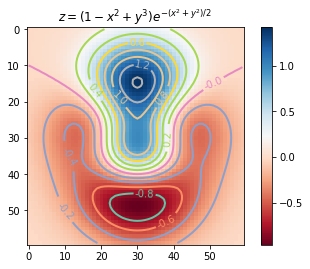

In [1]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

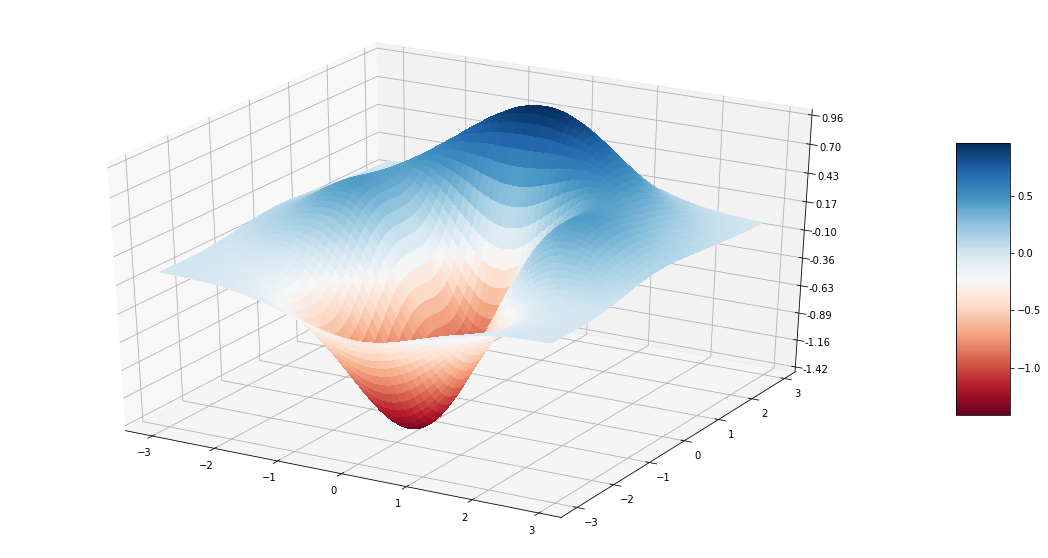

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, -Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

La derivada direccional en la dirección $ \mathbf{u} $ (un vector unitario) es la pendiente de la
función $ f $ en la dirección $ \mathbf{u} $. En otras palabras, la derivada direccional es la derivada de la función $ f(\mathbf {x} + \alpha \mathbf{u}) $ con respecto a $ \alpha $, evaluada en $ \alpha = 0 $.


Usando la regla de la cadena, podemos ver que $ \frac{\partial} {\partial \alpha} f (\mathbf{x} + \alpha) $
es dada por $ \mathbf{u}^t \nabla_xf (\mathbf{x}) $ when $ \alpha = 0 $.


Para minimizar $ f $, nos gustaría encontrar la dirección en la que $ f $ disminuye más rápido. Podemos hacer esto usando la derivada direccional:


$$
\min_{\{\mathbf{u}: \mathbf{u}^t\mathbf{u}=1\}} u^t\nabla_x f(\mathbf{x}) 
= \min_{\{\mathbf{u}: \mathbf{u}^t\mathbf{u}=1\}} ||\mathbf{u}||_2||\nabla_x f(\mathbf{x})||_2 \cos\theta,
$$

donde $ \theta $ es el ángulo entre $\mathbf{u}$ y el gradiente. Sustituyendo en $ ||\mathbf{u}|| _2 = 1 $ y
ignorando los factores que no dependen de $\mathbf{u}$, esto se simplifica a $ \min_{\mathbf{u}} \cos \theta $.

Esto se minimiza cuando $ \mathbf{u} $ apunta en la dirección opuesta al gradiente. En otra
palabras, el gradiente apunta directamente hacia arriba y el gradiente negativo apunta directamente cuesta abajo. Podemos disminuir $ f $ moviéndonos en la dirección del gradiente negativo.


Esto se conoce como el método del  **gradiente descendiente**, o descenso del gradiente. El método propone un nuevo punto

$$
\mathbf{x}' = \mathbf{x} − \alpha \nabla_x f(\mathbf{x})
$$


en donde $ \alpha $ es la **tasa de aprendizaje**, y corresponde a un escalar positivo que determina el tamaño del paso. Podemos elegir $ \alpha $ de varias maneras diferentes. Un enfoque popular es establecer $ \alpha$ en una pequeña constante.



A veces, podemos resolver el tamaño del paso que hace que la derivada direccional se vuelva cero. Otro enfoque es evaluar $ f (\mathbf{x} - \alpha \nabla_x f (\mathbf{x})) $ para varios
valores de $ \alpha $ y elija el que resulte en el valor de función objetivo más pequeño.

Esta última estrategia se llama búsqueda de línea. El descenso más pronunciado converge cuando cada elemento del gradiente es cero (o, en la práctica, muy cercano a cero). En algunos casos, podemos evitar ejecutar este algoritmo iterativo y simplemente saltar directamente al punto crítico resolviendo la ecuación $ \nabla_x f (\mathbf{x}) = 0 $ para $ \mathbf{x}$.

<h2> 3. Funciones de pérdida </h2>

El problema central en el aprendizaje de máquinas es la minimización de una función de pérdida. 
Los dos casos mas usuales, aunque no los únicos, son los asociados a problemas de regresión y aproblemas de clasificación. Por facilidad en la exposición supondremos los problemas de regresion y de clasificación binaria.

Supongamos que se tienen $N$ observaciones $(\mathbf{x}_i,y_i)$. En el aprendizaje de máquinas lo se busca en general es establecer una relación funcional entre las features, las variables predictivas $\mathbf{x}$, y una variables objetivo (target) $y$, de tal manera que

$$
y_i = f(\mathbf{\theta},\mathbf{x}_i) + \epsilon_i, \hspace{1mm} i =1,\ldots, N,
$$

en donde $\mathbf{\theta}$ es el parámetro de interés que se busca aprender (estimar). El proceso de aprendizaje consiste en encontrar $\mathbf{\theta}$ que minimiza una función de costo asociada a la función $f$.

<h3> Modelos de Regresión. El error cuadrático medio</h3>

<h4> Regresión lineal Gaussiana</h4>

Consideremos inicialmente el problema clásico de regresión lineal Gaussiano. En este caso suponemos que $\epsilon_i \sim N(0,\sigma_i^ 2)$. En este caso la función de *log verosimitud* es dada por 

$$
\mathcal{lv}(\mathbf{\theta}) = -\tfrac{1}{2\sigma_i^2}\sum_i (y_i- \tilde{y}_i)^ 2 - \tfrac{N}{2} \log 2\pi \sigma_i^2,
$$

en donde $\tilde{y}_i$ es el valor predicho por la función $f$. Así, si $\tilde{\mathbf{\theta}}$ es un valor aprendido para $\mathbf{\theta}$, entonces 

$$
\tilde{y}_i = f(\tilde{\mathbf{\theta}},\mathbf{x}_i) 
$$

En este caso, estamos suponiendo que $\mathbf{x} =(\mathbf{w},b)$ y que $f(\mathbf{\theta},\mathbf{x}_i) = \mathbf{w}'\mathbf{x}_i + b $. En este problema, $\mathbf{\theta}$ y $\sigma_i$ son parámetros que pueden ser estimados independientemente, por lo que dejaremos de lado la estimación de los $\sigma_i^2$. 

Ahora bien, la *log verosimilitud* mide el ajuste del modelo propuesto a los datos. En consecuencia una función de desajuste o **perdida** es dada por $-\frac{1}{N}\mathcal{lv}(\mathbf{\theta})$. Adicionalmente, como los $\sigma_i^2$ no son requerido en el proceso de optimización para encontrar $\tilde{ \mathbf{\theta}}$, se define la función de pérdida como el error cuadrático medio dado por

$$
\mathcal{l}(\mathbf{\theta}) = \tfrac{1}{N}\sum (y_i-\tilde{y}_i)^2.
$$


La razón de usar el promedio, es la utilización de la función de pérdida tanto para los datos de aprendizaje, como para los datos de validación. Por ejemplo, si se tiene $m$ observaciones para validación, y $n$ observaciones para el entrenamiento (estimación), entonces las repectivas funciones de pérdida dadas por $\mathcal{l}_v(\mathbf{\theta}) = \tfrac{1}{m}\sum (y_i-\tilde{y}_i)^2$ y $\mathcal{l}_t(\mathbf{\theta}) = \tfrac{1}{n}\sum (y_i-\tilde{y}_i)^2$ respectivamente tiene la misma escala y en consecuencia son comparables.



<h4> Red neuronal simple de regresión</h4>

Este mismo problema de regresión puede ser planteado de una manera más general, definiendo la función $f$ que ahora llamaremos *red neuronal* tiene la siguiente forma.

$$
f(\mathbf{\theta}, \mathbf{x}_i) = \mathbf{w}_2 ' g_1(\mathbf{W}_1 \mathbf{x}_i + \mathbf{b}_1) + b_2,
$$

en donde $g_1$ es una función no lineal, llamada función de activación, $\mathbf{W}_1$ es una matriz de pesos de tamaño $p\times q$, donde $q$ es un tamaño predefinido y $p$ corresponde al número de features. $\mathbf{b}_1$ es un $q$- vector (bias), $\mathbf{w}_2$ es un $q$-vector y $b_2$ es otro término bias. En este caso $\mathbf{\theta}=(\mathbf{W}_1,\mathbf{w}_2,\mathbf{b}_1 ,b_2)$. De nuevo el valor predicho es $\tilde{y}_i = f(\mathbf{\tilde{\theta}}, \mathbf{x}_i)$. La función de pérdida se define de la misma forma que arriba como el error cuadrático medio, pudiendose suponer el mismo modelo  probabilístico Gaussiano para los $e_i$.

- $\leadsto$ las funciones de activación más populares del comienzos de siglo fueron la tangente hiperbólica y el sigmoide, definido en la siguiente sección. Actualmente, la función de activación más extendida es la $ReLu$, o unidad lineal rectificada, definda por


$$
Relu(x) = \begin{cases} &x, \text{ si } x>0,\\
&0, \text{ en otro caso } \end{cases}.
$$

Una aproximación *suave*, es decir que  derivable en todo punto, es la función **softplus** definida por $f(x)= \log (1+ e^{x})$, cuya derivada es la función logística $f'(x) = 1/(1+ e^{-x})$

<h3> Modelos de Clasificación. La entropia cruzada</h3>

<h4> Modelo logístico</h4>

Consideremos  el problema clásico de clasificación en dos clases. En este caso suponemos que se tiene dos posibles valores $\{0,1\}$ para los target. Es decir $y_i \in $\{0,1\}$ 

La función de *log verosimitud* para cada observación es dada por un modelo de Bernoulli. Es decir 

$$
log p(\mathbf{\theta}) = y_i \log \mu(\mathbf{\theta},\mathbf{x}) + (1-y_i)\log(1-\mu(\mathbf{\theta},\mathbf{x})),
$$

y la función de pérdida es justamente la entropía cruzada dada por

$$
H_i(\mathbf{\theta}) = - y_i \log \mu(\mathbf{\theta},\mathbf{x}) - (1-y_i)\log(1-\mu(\mathbf{\theta},\mathbf{x})),
$$

En la práctica se usa la entropía cruzada promedio dada por

$$
H(\mathbf{\theta}) = - \tfrac{1}{N} \left[\sum_i y_i\log \mu(\mathbf{\theta},\mathbf{x}) +- (1-y_i)\log(1-\mu(\mathbf{\theta},\mathbf{x}))\right].
$$

En el modelo logístico clásico se tiene que

$$
\mu(\mathbf{\theta},\mathbf{x}) = \frac{1}{1 + \exp \{-(\mathbf{w}'\mathbf{x}_i + b) \}}
$$


Para obtener una medida de precisión (accuracy) se define el valor predicho $\tilde{y}_i$ como

$$
\tilde{y}_i = \begin{cases} &1 \text{ si } \mu(\tilde{\mathbf{\theta}},\mathbf{x}_i)>0.5\\
&0 \text{ si } \mu(\tilde{\mathbf{\theta}},\mathbf{x}_i)< 0.5 \end{cases}.
$$

Para el caso en que $ \mu(\tilde{\mathbf{\theta}},\mathbf{x}_i)=0.5$, el valor predicho se defien aleatoriamente usando el modelo de $\text{Bernoulli}(0.5)$.

La función de precisión se define por 

$$
acc = \frac{1}{N} \sum_i 1_{y_i=\tilde{y}_i}.
$$


<h4> Red neuronal simple de clasificación</h4>

Usando la misma nomenclatura de la red neuronal anterior, se define ahora

$$
\mu(\mathbf{\theta},\mathbf{x}) = \frac{1}{1 + \exp \{-(\mathbf{w}_2 ' g_1(\mathbf{W}_1 \mathbf{x}_i + \mathbf{b}_1) + b_2) \}}
$$


<h2> 4. Optimización en Máquinas de Aprendizaje </h2>



Sea $\mathbf{\theta} =\{W,b\}$ el conjunto de parámetros que debe aprender nuestra máquina $ \mathbf{\theta}_k $ representa la iteración $ k $ en el método iterativo; $ \mathcal{l} $ es el costo (función objetivo)

Actualmente (2020) los métodos de optimización general comúnmente utilizados en el aprendizaje automático se pueden escribir como

$$
\mathbf{\theta}_{k+1} =  \mathbf{\theta}_k - \eta_k  \nabla \mathcal{l}(\mathbf{\theta}_k),
$$

donde $ \eta_k $ es la tasa de aprendizaje. Según esta expresión, todos los elementos pueden cambiar en el proceso.




<h3> Método vainilla</h3>

<h4>Gradiente descendiente por lotes</h4>

El método vainilla de descenso de gradiente, también conocido como descenso de gradiente por lotes, calcula el gradiente de la función de pérdida  para el **conjunto de datos de entrenamiento completo**: es dado


$$
\theta_{k+1} =  \theta_k - \eta  \nabla \mathfrak{l}(\theta_k),
$$

El principal problema a resolver es el ajuste (tunning) de la tasa de aprendizaje $ \eta $.

Un fragmento de código puede verse como

In [ ]:
for i in range ( nb_epochs ):
params_grad = evaluate_gradient ( loss_function , data , params )
params = params - learning_rate * params_grad

<h4>Gradiente Descendiente Estocástico </h4>

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$, selected by random at  each epoch. 

$$
\mathbf{\theta}_{k+1} =  \mathbf{\theta}_k - \eta  \nabla \mathcal{l}(\mathbf{\theta}_k;x^{(i)} , y^{(i)}).
$$

En el artículo original de [Robbins and Monro (1951)](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586) $\eta$ cambia en cada iteración. Además para cada paso una observación $(\mathbf{x}_i,y_i)$ es seleccionada aleatoriamente de la muestra de los datos de entrenamiento. Este caso tenemos que

$$
\mathbf{\theta}_{k+1} =  \mathbf{\theta}_k - \eta_k  \nabla \mathcal{l}(\mathbf{\theta}_k;x^{(i)} , y^{(i)}),
$$

and $\eta_k$ is a sequence such $\sum_k \eta_k = \infty$, and $\sum_k \eta_k^2 < \infty$. For example $\eta_k = 1/k$. 


Robbins y Monro demostraron en la artículo que $\mathbf{\theta}\to \tilde{\mathbf{\theta}}$ en probabilidad. 

Un fragmento de código luce como:

In [ ]:
for i in range ( nb_epochs ):
    np. random.shuffle ( data )
    for example in data :
        params_grad = gradient ( loss_function , example , params )
        params = params - learning_rate * params_grad
    # update learning_rate here. For example learning_rate  = 1/(i+1)

<h4> Minibatch  Gradiente descendiente con mini-lotes </h4>


El descenso de gradiente de mini lotes finalmente toma lo mejor de ambos mundos anteriores y realiza una actualización para cada mini lote de n ejemplos de entrenamiento:

$$
\theta_{k+1} =  \theta_k - \eta_k  \nabla \mathcal{l}(\theta_k;\mathbf{x}^{(i:i+n)} , y^{(i:i+n )})
$$

A partir de este punto de la lección, asumiremos que **tomamos mini-lotes**, por lo que omitimos los datos $ \mathbf{x}^(i: i + n) $ y $ y ^ {(i: i + n) $ in las expresiones.

un fragmento de código para este método puede verse como

In [ ]:
for i in range ( nb_epochs ):
    np. random.shuffle ( data )
    for batch in get_batches (data , batch_size =50):
        params_grad = gradient ( loss_function , batch , params )
        params = params - learning_rate * params_grad
    # update learning_rate here. For example learning_rate  = 1/(i+1)


El tamaño de los minibatchs depende del problema y puede ser 50, 100, 250, 500, etc. Sin embargo algunos estudios experimentales reportados indican que en muchos casos 32 es un valor que entrega los mejores resultados.

<h4>Discussion </h4>

El vainilla del descenso de gradiente para mini lotes no garantiza una buena convergencia y pero ofrece algunos desafíos que deben abordarse:

1. Elegir una tasa de aprendizaje adecuada puede ser difícil. Una tasa de aprendizaje demasiado pequeña conduce a convergencia dolorosamente lenta, mientras que una tasa de aprendizaje que es demasiado grande puede dificultar la convergencia y hacer que la función de pérdida fluctúe alrededor del mínimo o incluso diverja.
2. La programación de la actualización de la tasa de aprendizaje intentan ajustar la tasa durante el entrenamiento, por ejemplo en el método de recocido,  la tasa de aprendizaje se reduce de acuerdo con una programación predefinida o cuando el cambio de la función de pérdida entre epochs cae por debajo de un umbral. Sin embargo, estas programaciones y umbrales deben definirse de antemano y, por lo tanto, no pueden adaptarse a las características de un conjunto de datos
3. Además, la misma tasa de aprendizaje se aplica a todas las actualizaciones de parámetros. Si nuestros datos son escasos y nuestras funciones tienen frecuencias muy diferentes, es posible que no querramos actualizarlos todos en la misma medida, sino que realicemos una actualización más grande para las funciones que ocurren con poca frecuencia.
4. Otro desafío clave de minimizar las funciones de error altamente no convexas comunes para las redes neuronales es evitar quedar atrapado en sus numerosos mínimos locales subóptimos. Algunos autores argumentan que la dificultad surge, de hecho, no de los mínimos locales sino de los puntos de silla de montar, es decir, puntos donde una dimensión se inclina hacia arriba y otra se inclina hacia abajo. Estos puntos de silla generalmente están rodeados por una meseta del mismo error, lo que hace que sea muy difícil para SGD escapar, ya que el gradiente está cerca de cero en todas las dimensiones. [Silla de montar](https://upload.wikimedia.org/wikipedia/commons/1/1e/Saddle_point.svg)

<h4> Algorithm Adam</h4>

En el artículo de [Diederik P. Kingma, Jimmy Ba, 2017](https://arxiv.org/pdf/1412.6980.pdf) se propone el algoritmo Adam para la optimización estocástica. $ g^2_t $ indica el cuadrado de elemento $ g_t \bigodot g_t $. Las buenas configuraciones predeterminadas para los problemas de aprendizaje automático probados son $ \alpha = 0.001 $, $ \beta_1 = 0.9 $, $ \beta_2 = 0.999 $ y $ \epsilon = 10−8 $. Todas las operaciones en vectores son de elementos sabios. Con $ \beta_1 ^ t $ y $ \beta_2^t $ denotan la potencia $ t $.

1. Require: $\alpha$: Stepsize
2. Require: $\beta_1^t$ and $\beta_2^t \in [0, 1)$. Exponential decay rates for the moment estimates
3. Require: $f(\theta)$: Stochastic objective function with parameters $\theta$
4. Require: $\theta_0$: Initial parameter vector
5.  $m_0  = 0$ (Initialize 1st moment vector)
6. $v_0 =  0$ (Initialize 2nd moment vector)
7. $t =  0$ (Initialize timestep)
8. while $\theta_t$ not converged do


$
\begin{equation}
\begin{split}
t  &= t + 1 \\
g_t &=  \nabla f_t(\theta_{t-1}) \text{ (Get gradients w.r.t. stochastic objective at timestep t)}\\
m_t  &= \beta_1 m_{t−1} + (1 − \beta_1) · g_t \text{ (Update biased first raw moment estimate)}\\
v_t  &= \beta_2 v_{t−1} + (1 − \beta_2) · g_t^2 \text{ (Update second raw moment estimate)}\\
\hat{m}_t  &= \frac{m_t}{1 − \beta_1^t}   \text{ (Compute bias-corrected first moment estimate)}\\ 
\hat{v}_t  &=  \frac{v_t}{1 − \beta_2^t}  \text{ (Compute bias-corrected second moment estimate)}\\ 
\theta_t &=   \theta_{t-1}  - \alpha  \frac{\hat{m}_t}{\hat{v}_t + epsilon} \text{ (Update parameters)}\\
\end{split}
\end{equation}
$


end while

return $\theta_t$ (Resulting parameters)